In [2]:
import os, shutil

In [3]:
original_dataset_dir = '/Users/anthonyastarita/HWCode/412HW2/train'

In [4]:
base_dir = '/Users/anthonyastarita/HWCode/412HW2/cats_and_dogs_small'

In [5]:
#os.mkdir(base_dir)

In [6]:
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

In [7]:
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

In [8]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

In [9]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)


In [10]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

In [11]:
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

KeyboardInterrupt: 

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

('total training cat images:', 1000)


In [13]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

('total training dog images:', 1000)
('total validation cat images:', 500)
('total validation dog images:', 500)
('total test cat images:', 500)
('total test dog images:', 500)


In [14]:
import keras

In [15]:
from keras import layers
from keras import models

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(150, 150, 3)))

In [21]:
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [23]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adadelta(lr=1e-4), metrics=['acc'])

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [27]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [28]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 208s 2s/step - loss: 0.6974 - acc: 0.4970 - val_loss: 0.6751 - val_acc: 0.4910
Epoch 2/30
100/100 [==============================] - 210s 2s/step - loss: 0.6957 - acc: 0.5000 - val_loss: 0.6877 - val_acc: 0.4750
Epoch 3/30
 23/100 [=====>........................] - ETA: 2:27 - loss: 0.6931 - acc: 0.5022

KeyboardInterrupt: 

In [41]:
model.save('cats_and_dogs_small_1.h5')

In [38]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

<Figure size 432x288 with 0 Axes>

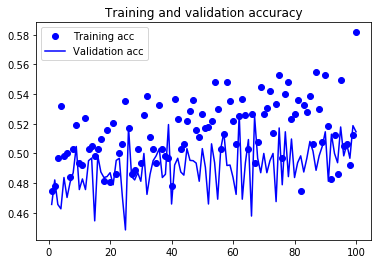

<Figure size 432x288 with 0 Axes>

In [39]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

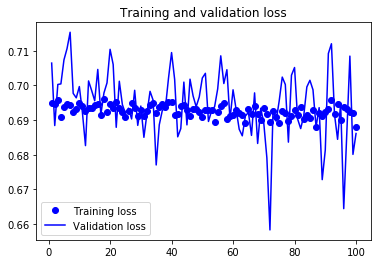

In [40]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


In [30]:
from keras.preprocessing import image

fnames = [os.path.join(train_dogs_dir, fname) for
     fname in os.listdir(train_dogs_dir)]

img_path = fnames[3] 
img = image.load_img(img_path, target_size=(150, 150))

In [31]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

In [32]:
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

NameError: name 'plt' is not defined

In [60]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [36]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [37]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=20)

Epoch 1/100
20/20 [==============================] - 51s 3s/step - loss: 0.6949 - acc: 0.4750 - val_loss: 0.7064 - val_acc: 0.4656
Epoch 2/100
20/20 [==============================] - 44s 2s/step - loss: 0.6947 - acc: 0.4781 - val_loss: 0.6884 - val_acc: 0.4821
Epoch 3/100
20/20 [==============================] - 37s 2s/step - loss: 0.6959 - acc: 0.4969 - val_loss: 0.7003 - val_acc: 0.4656
Epoch 4/100
20/20 [==============================] - 39s 2s/step - loss: 0.6909 - acc: 0.5321 - val_loss: 0.7004 - val_acc: 0.4627
Epoch 5/100
20/20 [==============================] - 42s 2s/step - loss: 0.6936 - acc: 0.4984 - val_loss: 0.7074 - val_acc: 0.4838
Epoch 6/100
20/20 [==============================] - 41s 2s/step - loss: 0.6947 - acc: 0.5000 - val_loss: 0.7106 - val_acc: 0.4703
Epoch 7/100
20/20 [==============================] - 40s 2s/step - loss: 0.6943 - acc: 0.4844 - val_loss: 0.7153 - val_acc: 0.4805
Epoch 8/100
20/20 [==============================] - 43s 2s/step - loss: 0.6924 - a

20/20 [==============================] - 35s 2s/step - loss: 0.6910 - acc: 0.5369 - val_loss: 0.6855 - val_acc: 0.4692
Epoch 64/100
20/20 [==============================] - 34s 2s/step - loss: 0.6894 - acc: 0.5256 - val_loss: 0.6912 - val_acc: 0.4935
Epoch 65/100
20/20 [==============================] - 35s 2s/step - loss: 0.6931 - acc: 0.5031 - val_loss: 0.6922 - val_acc: 0.5094
Epoch 66/100
20/20 [==============================] - 39s 2s/step - loss: 0.6919 - acc: 0.5266 - val_loss: 0.6856 - val_acc: 0.4578
Epoch 67/100
20/20 [==============================] - 41s 2s/step - loss: 0.6941 - acc: 0.4938 - val_loss: 0.6979 - val_acc: 0.5250
Epoch 68/100
20/20 [==============================] - 42s 2s/step - loss: 0.6919 - acc: 0.5078 - val_loss: 0.6833 - val_acc: 0.4968
Epoch 69/100
20/20 [==============================] - 37s 2s/step - loss: 0.6900 - acc: 0.5449 - val_loss: 0.6934 - val_acc: 0.4870
Epoch 70/100
20/20 [==============================] - 40s 2s/step - loss: 0.6935 - acc: 0

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adadelta(lr=1e-4),
              metrics=['acc'])

In [67]:
model.save('cats_and_dogs_small_2.h5')

In [71]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')

In [72]:
img_path = '/Users/anthonyastarita/HWCode/412HW2/cats_and_dogs_small/test/cats/cat.1700.jpg'

In [73]:
from keras.preprocessing import image 
import numpy as np

img = image.load_img(img_path, target_size=(150, 150)) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

In [74]:
print(img_tensor.shape)

(1, 150, 150, 3)


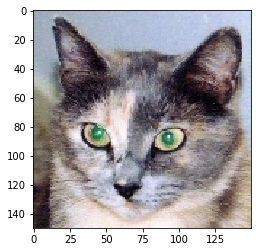

In [75]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [76]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [79]:
activations = activation_model.predict(img_tensor)

In [80]:
first_layer_activation = activations[0]

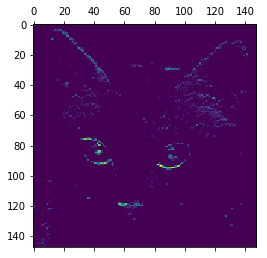

In [81]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

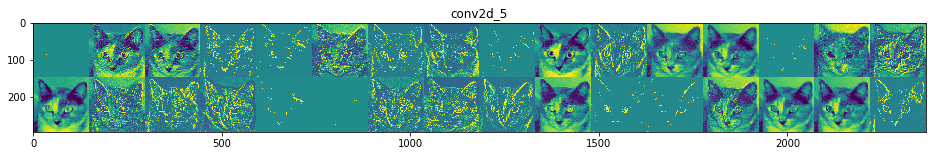

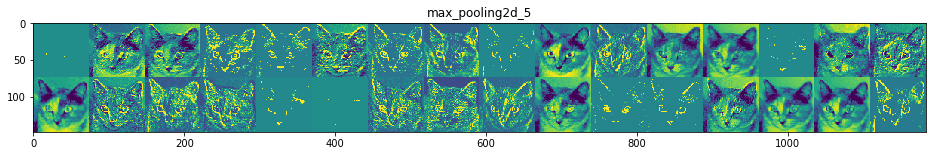

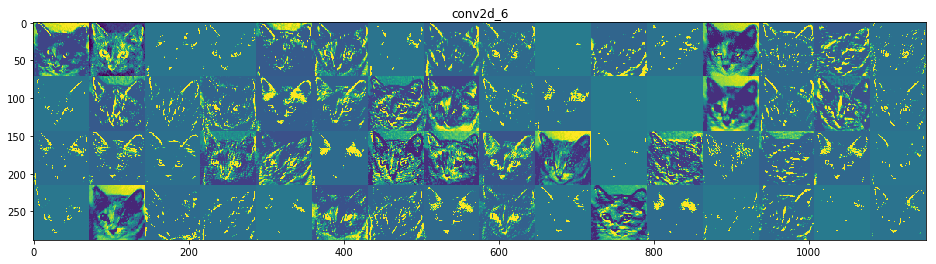

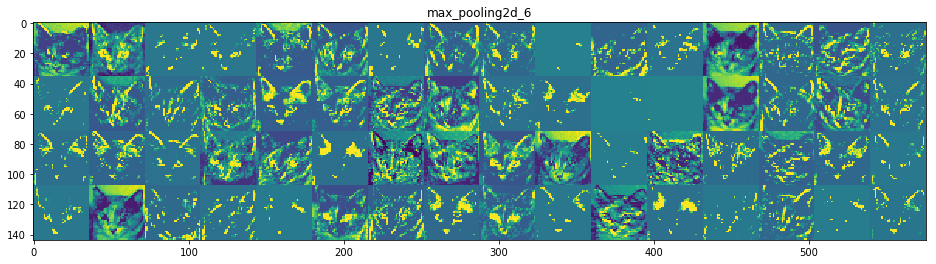

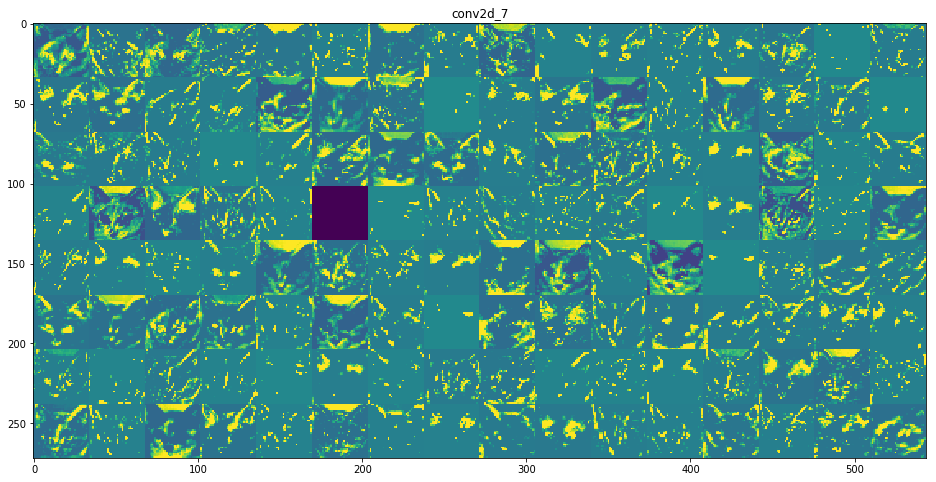

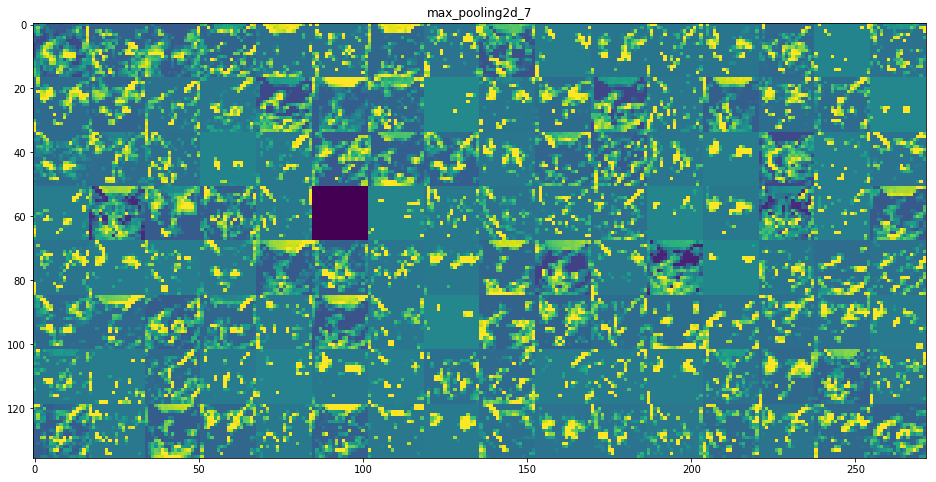

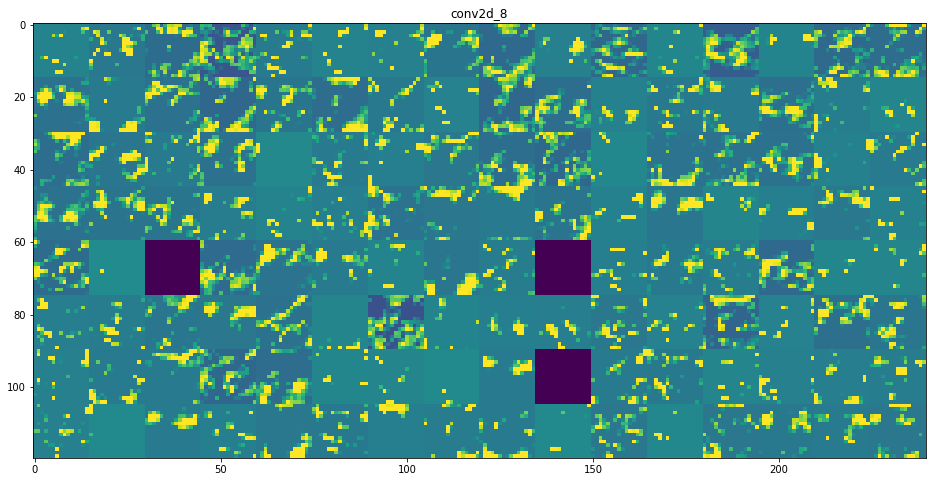

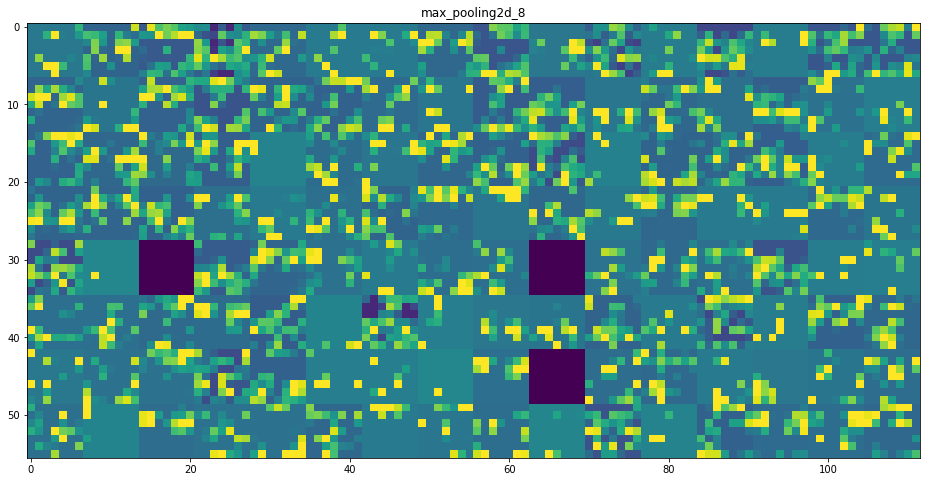

In [84]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]

        size = layer_activation.shape[1]

        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [85]:
from keras.applications import VGG16
from keras import backend as K
model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

58900480/58889256 [==============================] - 5s 0us/step


In [86]:
grads = K.gradients(loss, model.input)[0]

In [87]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [88]:
iterate = K.function([model.input], [loss, grads])
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [89]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
  
step = 1.

for i in range(40):
    loss_value, grads_value = iterate([input_img_data])

    input_img_data += grads_value * step

In [93]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [97]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

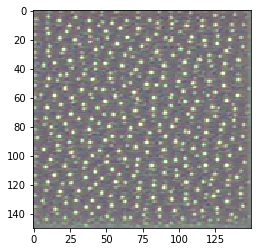

In [98]:
plt.imshow(generate_pattern('block3_conv1', 0))

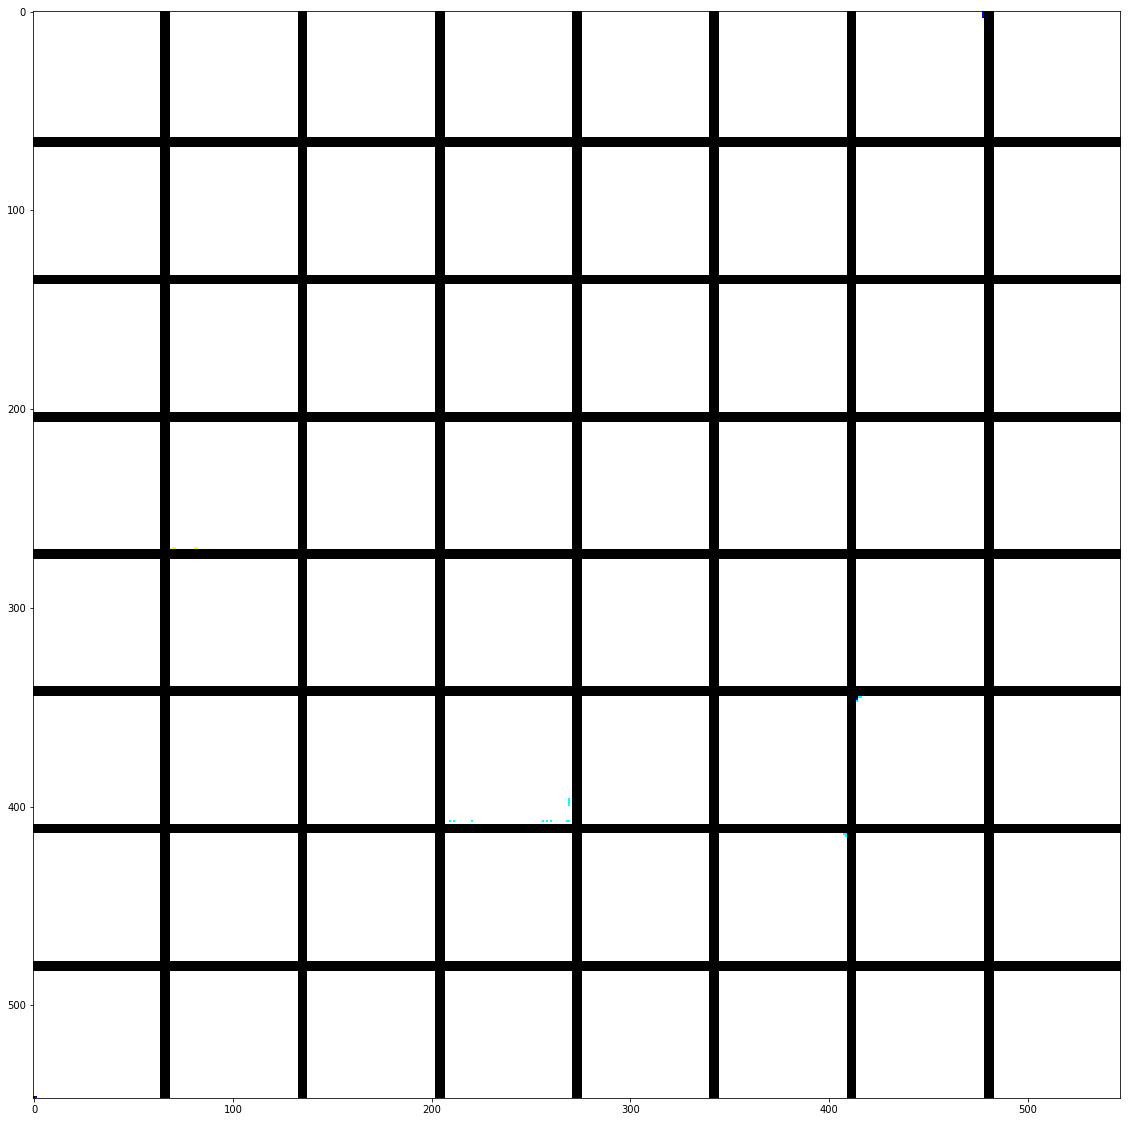

In [99]:
layer_name = 'block1_conv1'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end,vertical_start: vertical_end, :] = filter_img
plt.figure(figsize=(20, 20))
plt.imshow(results)